# Prediction of immunotherapy response

# Table of contents

0. [Reading dataset](#0-reading-dataset)
1. [Classic classifier](#1-classic-classifier)
2. [GCN classifier](#2-gnn-classifier)
3. [Compare models](#3-compare-models)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from evaluation.ClassificationMetrics import ClassificationMetrics

from manage.BinaryClassifierTrainTestManager import BinaryClassifierTrainTestManager
from manage.GCNClassifierTrainTestManager import GCNClassifierTrainTestManager

from models.BinaryClassifier import BinaryClassifier
from models.GCNClassifier import GCNClassifier

from utils.preProcessing import preProcessing

from sklearn.linear_model import LogisticRegression

## 0. Reading dataset and preprocessing

In [2]:
## No mutational signatures
df_no_sigmut = pd.read_excel('data/Supplemental-table1.xlsx')
df_no_sigmut = df_no_sigmut.loc[df_no_sigmut["Cohort"] == "Naive"]

## Mutational signatures
df_sigmut = pd.read_excel('data/table-s1-sigmut.xlsx')
df_sigmut = df_sigmut.loc[df_sigmut["Cohort"] == "Naive"]

In [3]:
## No mutational signatures
# Drop NaN values
df_no_sigmut = preProcessing.delete_nan_values(df_no_sigmut)
# Select and normalize features
features_name_no_sigmut = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression"]
X_no_sigmut = df_no_sigmut.loc[:,features_name_no_sigmut].to_numpy()
# Normalize data
X_no_sigmut = preProcessing.normalize_data(X_no_sigmut)
# Numerize label
label_name = "Clinical benefit"
y_no_sigmut = np.where(df_no_sigmut[label_name]=="DCB",1,0)

## Mutational signatures
# Drop NaN values
df_sigmut = preProcessing.delete_nan_values(df_sigmut)
# Select and normalize features
features_name_sigmut = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression","SBS2","SBS4","SBS18","SBS5","SBS6","SBS7a","SBS7b","SBS7c","SBS13","SBS26","SBS44"]
X_sigmut = df_sigmut.loc[:,features_name_sigmut].to_numpy()
# Normalize data
X_sigmut = preProcessing.normalize_data(X_sigmut)
# Numerize label
y_sigmut = np.where(df_sigmut[label_name]=="DCB",1,0)

## 1. Classic classifier
We use a logistic regression classifier.

In [4]:
# Instanciate classifier
classic_clf_no_sigmut = BinaryClassifier(LogisticRegression())
classic_clf_sigmut = BinaryClassifier(LogisticRegression())

# Instanciate the train-test manager
classic_manager_no_sigmut = BinaryClassifierTrainTestManager(classic_clf_no_sigmut)
classic_manager_sigmut = BinaryClassifierTrainTestManager(classic_clf_sigmut)

### Make the leave one out cross validation

In [5]:
## No sigmut
test_classes_classic_no_sigmut, test_scores_classic_no_sigmut = classic_manager_no_sigmut.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut)

## Sigmut
test_classes_classic_sigmut, test_scores_classic_sigmut = classic_manager_sigmut.leave_one_out_cross_validation(X_sigmut, y_sigmut)

## 2. GCN classifier

In [6]:
# Instanciate GCN classifier
gcn_clf_no_sigmut = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut = GCNClassifierTrainTestManager(gcn_clf_no_sigmut)
gcn_manager_sigmut = GCNClassifierTrainTestManager(gcn_clf_sigmut)

### Make the leave one out cross validation

In [7]:
# Group labels for connecting patients (tumour type)
group_no_sigmut = df_no_sigmut["Tumour type"].to_numpy()
group_sigmut = df_sigmut["Tumour type.1"].to_numpy()

## No sigmut
test_scores_gcn_no_sigmut, test_classes_gcn_no_sigmut = gcn_manager_no_sigmut.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut, 50)

## Sigmut
test_scores_gcn_sigmut, test_classes_gcn_sigmut = gcn_manager_sigmut.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut, 50)

## 3. Compare models

In [8]:
## Classic classifier - no sigmut
acc_classic_no_sigmut, pre_classic_no_sigmut, rec_classic_no_sigmut, f1_classic_no_sigmut = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_classic_no_sigmut)
fpr_classic_no_sigmut, tpr_classic_no_sigmut, thresholds_classic_no_sigmut = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_classic_no_sigmut)
auc_classic_no_sigmut = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_classic_no_sigmut)

## Classic classifier - sigmut
acc_classic_sigmut, pre_classic_sigmut, rec_classic_sigmut, f1_classic_sigmut = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_classic_sigmut)
fpr_classic_sigmut, tpr_classic_sigmut, thresholds_classic_sigmut = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_classic_sigmut)
auc_classic_sigmut = ClassificationMetrics.compute_auc(y_sigmut, test_scores_classic_sigmut)

## GCN classifier - no sigmut
acc_gcn_no_sigmut, pre_gcn_no_sigmut, rec_gcn_no_sigmut, f1_gcn_no_sigmut = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut)
fpr_gcn_no_sigmut, tpr_gcn_no_sigmut, thresholds_gcn_no_sigmut = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut)
auc_gcn_no_sigmut = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut)

## GCN classifier - sigmut
acc_gcn_sigmut, pre_gcn_sigmut, rec_gcn_sigmut, f1_gcn_sigmut = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut)
fpr_gcn_sigmut, tpr_gcn_sigmut, thresholds_gcn_sigmut = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut)
auc_gcn_sigmut = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut)

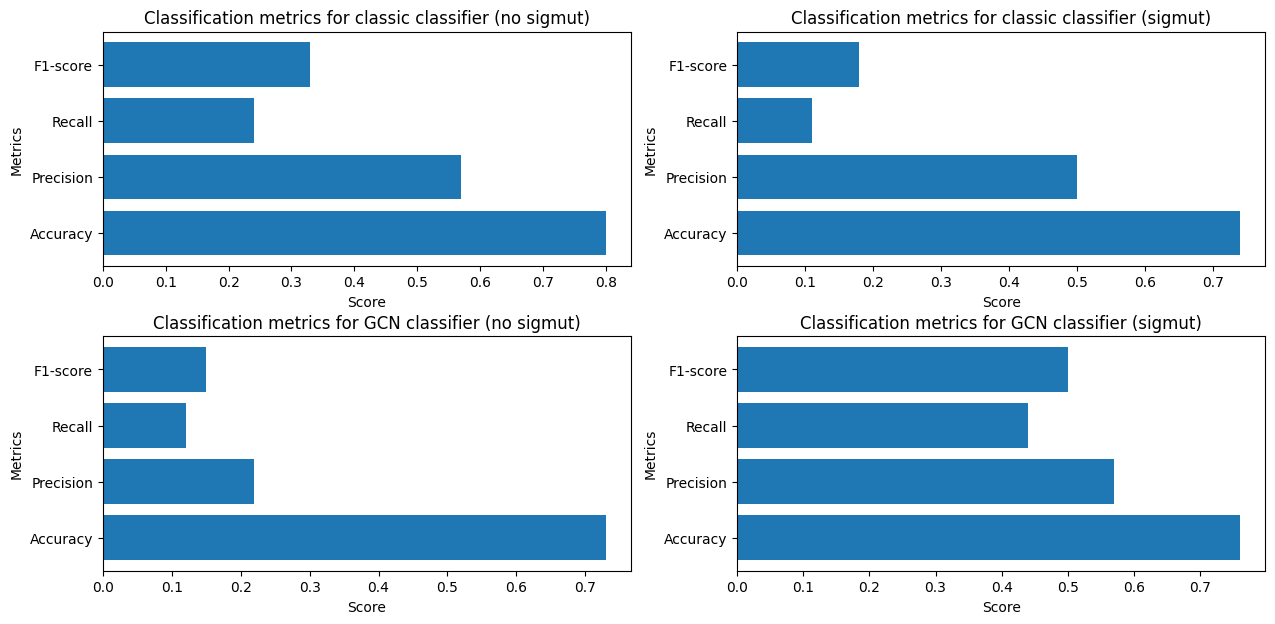

In [16]:
fig, ax = plt.subplots(2,2,figsize=(15,7))

ax[0,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_classic_no_sigmut, pre_classic_no_sigmut, rec_classic_no_sigmut, f1_classic_no_sigmut])
ax[0,0].set_xlabel("Score")
ax[0,0].set_ylabel("Metrics")
ax[0,0].set_title("Classification metrics for classic classifier (no sigmut)")

ax[0,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_classic_sigmut, pre_classic_sigmut, rec_classic_sigmut, f1_classic_sigmut])
ax[0,1].set_xlabel("Score")
ax[0,1].set_ylabel("Metrics")
ax[0,1].set_title("Classification metrics for classic classifier (sigmut)")

ax[1,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut, pre_gcn_no_sigmut, rec_gcn_no_sigmut, f1_gcn_no_sigmut])
ax[1,0].set_xlabel("Score")
ax[1,0].set_ylabel("Metrics")
ax[1,0].set_title("Classification metrics for GCN classifier (no sigmut)")

ax[1,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut, pre_gcn_sigmut, rec_gcn_sigmut, f1_gcn_sigmut])
ax[1,1].set_xlabel("Score")
ax[1,1].set_ylabel("Metrics")
ax[1,1].set_title("Classification metrics for GCN classifier (sigmut)")

plt.subplots_adjust(hspace=0.3)

Text(0, 0.7, 'AUC sigmut : 0.75')

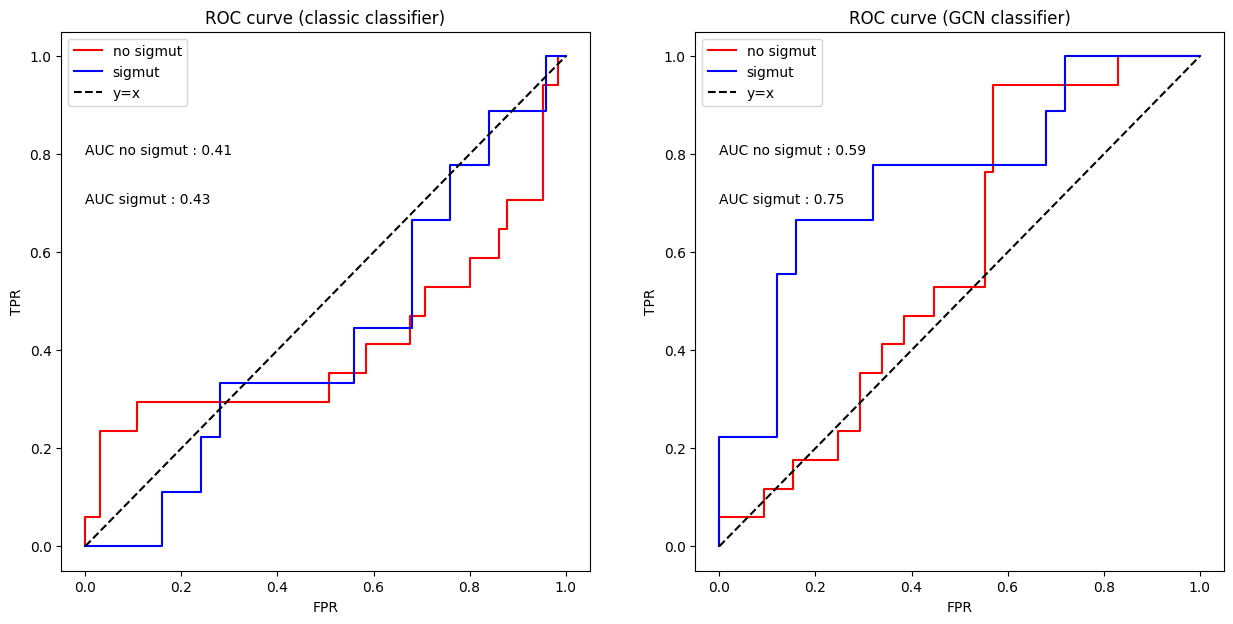

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
x = np.linspace(0,1,100)

# Classic classifier :
ax[0].plot(fpr_classic_no_sigmut, tpr_classic_no_sigmut, color='red',label='no sigmut')
ax[0].plot(fpr_classic_sigmut, tpr_classic_sigmut, color='blue',label='sigmut')
ax[0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[0].set_xlabel('FPR')
ax[0].set_ylabel('TPR')
ax[0].set_title('ROC curve (classic classifier)')
ax[0].legend()
ax[0].text(0,0.8,f"AUC no sigmut : {auc_classic_no_sigmut}")
ax[0].text(0,0.7,f"AUC sigmut : {auc_classic_sigmut}")

# GCN classifier :
ax[1].plot(fpr_gcn_no_sigmut, tpr_gcn_no_sigmut, color='red',label='no sigmut')
ax[1].plot(fpr_gcn_sigmut, tpr_gcn_sigmut, color='blue',label='sigmut')
ax[1].plot(x,x,linestyle='--',color='black',label='y=x')
ax[1].set_xlabel('FPR')
ax[1].set_ylabel('TPR')
ax[1].set_title('ROC curve (GCN classifier)')
ax[1].legend()
ax[1].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut}")
ax[1].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut}")